# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

In [2]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


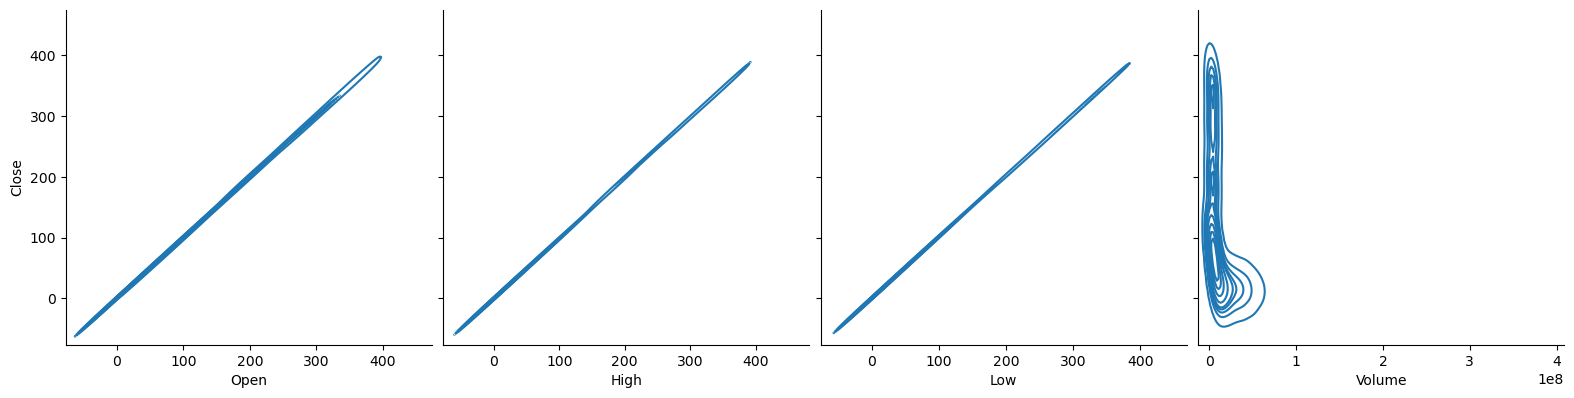

In [3]:
sb.pairplot(stocks_df, x_vars=['Open', 'High', 'Low', 'Volume'], y_vars='Close', height=4, aspect=1, kind='kde')
plt.show()

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_12171/256276199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(stocks_df.corr(), cmap='Blues', annot=True)


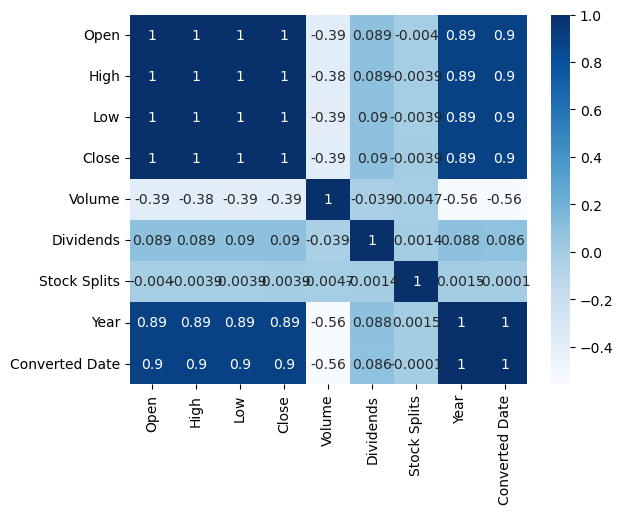

In [4]:
# stocks_df = stocks_df.drop('Date', axis=1)
sb.heatmap(stocks_df.corr(), cmap='Blues', annot=True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [5]:
x=stocks_df['Open']
y=stocks_df['Close']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [10]:
x_train.head()

2457     84.777597
1540     41.789692
384      18.706097
2560     90.718854
3320    257.031441
Name: Open, dtype: float64

In [11]:
y_train.head()

2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
Name: Close, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [12]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const    0.140820
Open     0.998287
dtype: float64

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [13]:
plt.scatter(x_train, res)
plt.show()

NameError: name 'res' is not defined

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

<Figure size 640x480 with 0 Axes>

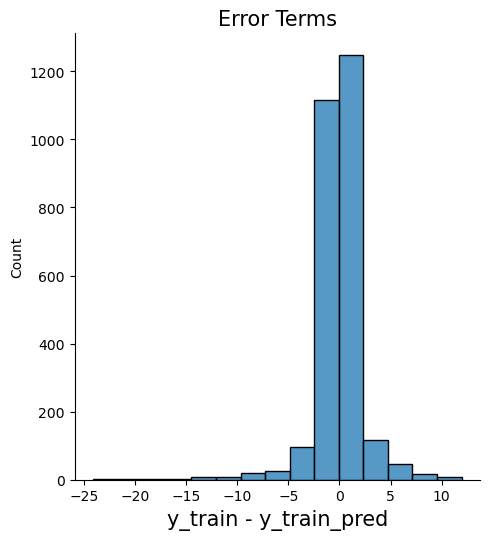

In [15]:
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sb.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Now plot the residuals. Did you get a bell curve?

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 